# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_HighDomino_1.csv")
df.head()

,userName,score,at,content
0,Arman Hasibuan,5,2024-06-07 06:47:09,Kasih tombol kirim
1,IWAN eFENDI,1,2024-06-07 06:37:17,apa ini apa apa
2,Ipul Putrapratama,1,2024-06-07 06:31:55,😭😭😭😭
3,Manik Lee,1,2024-06-07 06:20:44,Bnyk korban scatter skrg :v
4,SeJe Gaming,1,2024-06-07 06:19:21,Semakin memburuk.


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Kasih tombol kirim,Arman Hasibuan,2024-06-07 06:47:09
1,apa ini apa apa,IWAN eFENDI,2024-06-07 06:37:17
2,😭😭😭😭,Ipul Putrapratama,2024-06-07 06:31:55
3,Bnyk korban scatter skrg :v,Manik Lee,2024-06-07 06:20:44
4,Semakin memburuk.,SeJe Gaming,2024-06-07 06:19:21
...,...,...,...
1495,Keren,Wie Ponsel,2024-06-02 09:24:42
1496,Fitur tukar mu lo ndi bngst,Whayu Udin,2024-06-02 09:23:45
1497,"Game sih asik ,tapi yg jadi gk asiknya gk ada ...",Ahmad Wijayanto,2024-06-02 09:19:30
1498,Nggih,Ardan Dan,2024-06-02 09:12:51


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1500 non-null   object
 1   userName  1500 non-null   object
 2   at        1500 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1500,1500,1500
unique,1324,1495,1494
top,Ok,Ahmad Wahyudi,2024-06-04 00:32:08
freq,35,2,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1500, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(1324, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,kasih tombol kirim,Arman Hasibuan,2024-06-07 06:47:09
1,apa ini apa apa,IWAN eFENDI,2024-06-07 06:37:17
2,,Ipul Putrapratama,2024-06-07 06:31:55
3,bnyk korban scatter skrg v,Manik Lee,2024-06-07 06:20:44
4,semakin memburuk,SeJe Gaming,2024-06-07 06:19:21
...,...,...,...
1494,the best,Ady Putra,2024-06-02 09:25:13
1496,fitur tukar mu lo ndi bngst,Whayu Udin,2024-06-02 09:23:45
1497,game sih asik tapi yg jadi gk asiknya gk ada l...,Ahmad Wijayanto,2024-06-02 09:19:30
1498,nggih,Ardan Dan,2024-06-02 09:12:51


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,kasih tombol kirim,Arman Hasibuan,2024-06-07 06:47:09
1,apa ini apa apa,IWAN eFENDI,2024-06-07 06:37:17
2,,Ipul Putrapratama,2024-06-07 06:31:55
3,bnyk korban scatter skrg v,Manik Lee,2024-06-07 06:20:44
4,semakin memburuk,SeJe Gaming,2024-06-07 06:19:21
...,...,...,...
1494,the best,Ady Putra,2024-06-02 09:25:13
1496,fitur tukar mu lo ndi bngst,Whayu Udin,2024-06-02 09:23:45
1497,game sih asik tapi yang jadi gk asiknya gk ada...,Ahmad Wijayanto,2024-06-02 09:19:30
1498,nggih,Ardan Dan,2024-06-02 09:12:51


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,kasih tombol kirim,Arman Hasibuan,2024-06-07 06:47:09
1,apa apa apa,IWAN eFENDI,2024-06-07 06:37:17
2,,Ipul Putrapratama,2024-06-07 06:31:55
3,bnyk korban scatter skrg v,Manik Lee,2024-06-07 06:20:44
4,semakin memburuk,SeJe Gaming,2024-06-07 06:19:21
...,...,...,...
1494,the best,Ady Putra,2024-06-02 09:25:13
1496,fitur tukar mu lo ndi bngst,Whayu Udin,2024-06-02 09:23:45
1497,game sih asik yang jadi gk asiknya gk lagi tuk...,Ahmad Wijayanto,2024-06-02 09:19:30
1498,nggih,Ardan Dan,2024-06-02 09:12:51


In [19]:
# 3. Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                  [kasih, tombol, kirim]
1                                         [apa, apa, apa]
2                                                      []
3                        [bnyk, korban, scatter, skrg, v]
4                                     [semakin, memburuk]
                              ...                        
1494                                          [the, best]
1496                   [fitur, tukar, mu, lo, ndi, bngst]
1497    [game, sih, asik, yang, jadi, gk, asiknya, gk,...
1498                                              [nggih]
1499    [perlu, event, gama, terlalu, bayak, bug, tida...
Name: content, Length: 1324, dtype: object

In [20]:
# # 4. Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HighDomino_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HighDomino_1.csv', encoding = 'latin1')
df_clean

,content
0,kasih tombol kirim
1,apa apa apa
2,NaN
3,bnyk korban scatter skrg v
4,makin buruk
...,...
1319,the best
1320,fitur tukar mu lo ndi bngst
1321,game sih asik yang jadi gk asiknya gk lagi tuk...
1322,nggih


# **Translate**

In [22]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [23]:
# import pandas as pd
# from easynmt import EasyNMT

In [24]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HighDomino_1.csv', encoding='latin1')

In [25]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HighDomino_1.csv')

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HighDomino_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,kasih tombol kirim,Give me the send button
1,1,apa apa apa,What's wrong?
2,2,apa apa apa,What's wrong?
3,3,bnyk korban scatter skrg v,There's a lot of scarter victims now v.
4,4,makin buruk,It's getting worse.
...,...,...,...
1319,1319,the best,the best
1320,1320,fitur tukar mu lo ndi bngst,Your exchange feature lo ndi bngst
1321,1321,game sih asik yang jadi gk asiknya gk lagi tuk...,It's a fun game. It's not fun to exchange puls...
1322,1322,nggih,Sophisticated.


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HighDomino_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,kasih tombol kirim,Give me the send button
1,1,apa apa apa,What's wrong?
2,2,apa apa apa,What's wrong?
3,3,bnyk korban scatter skrg v,There's a lot of scarter victims now v.
4,4,makin buruk,It's getting worse.
...,...,...,...
1319,1319,the best,the best
1320,1320,fitur tukar mu lo ndi bngst,Your exchange feature lo ndi bngst
1321,1321,game sih asik yang jadi gk asiknya gk lagi tuk...,It's a fun game. It's not fun to exchange puls...
1322,1322,nggih,Sophisticated.


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 397
Netral = 475
Negatif = 452

Total Data Seluruhnya : 1324


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,kasih tombol kirim,Give me the send button,Netral
1,1,apa apa apa,What's wrong?,Negatif
2,2,apa apa apa,What's wrong?,Negatif
3,3,bnyk korban scatter skrg v,There's a lot of scarter victims now v.,Netral
4,4,makin buruk,It's getting worse.,Negatif
...,...,...,...,...
1319,1319,the best,the best,Positif
1320,1320,fitur tukar mu lo ndi bngst,Your exchange feature lo ndi bngst,Netral
1321,1321,game sih asik yang jadi gk asiknya gk lagi tuk...,It's a fun game. It's not fun to exchange puls...,Negatif
1322,1322,nggih,Sophisticated.,Positif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,kasih tombol kirim,Give me the send button,Netral
1,apa apa apa,What's wrong?,Negatif
2,apa apa apa,What's wrong?,Negatif
3,bnyk korban scatter skrg v,There's a lot of scarter victims now v.,Netral
4,makin buruk,It's getting worse.,Negatif
...,...,...,...
1319,the best,the best,Positif
1320,fitur tukar mu lo ndi bngst,Your exchange feature lo ndi bngst,Netral
1321,game sih asik yang jadi gk asiknya gk lagi tuk...,It's a fun game. It's not fun to exchange puls...,Negatif
1322,nggih,Sophisticated.,Positif


# **Visualisasi**


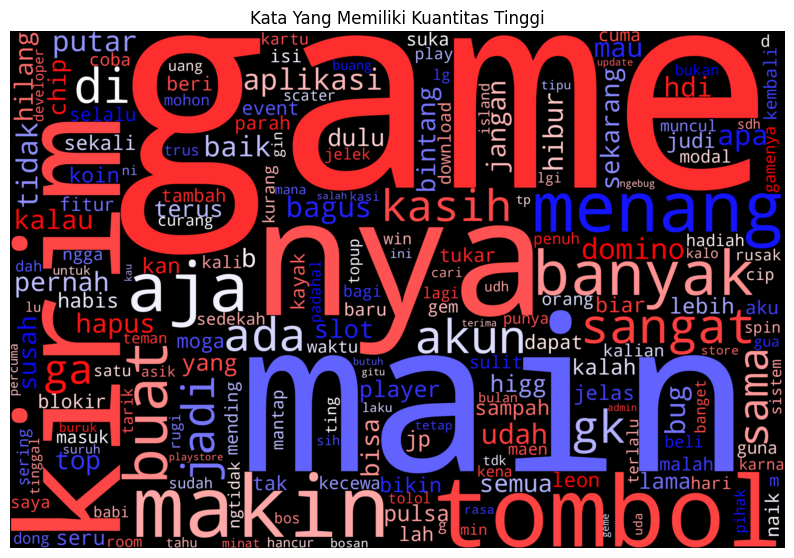

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


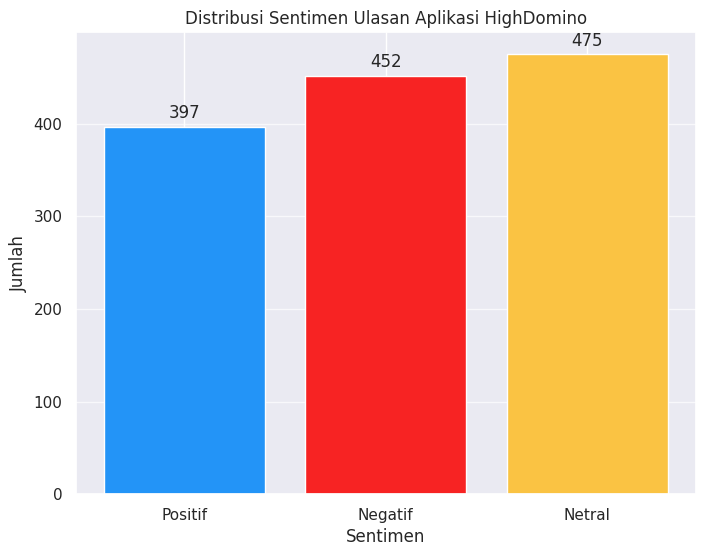

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HighDomino")


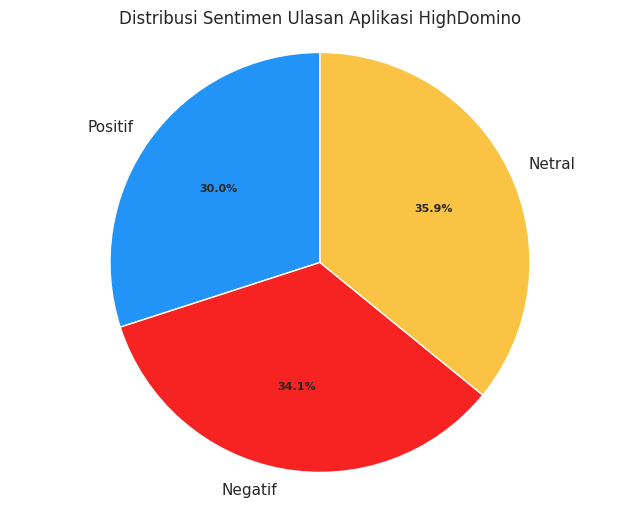

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HighDomino")

In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,apa apa apa,What's wrong?,Negatif
2,apa apa apa,What's wrong?,Negatif
4,makin buruk,It's getting worse.,Negatif
6,ting parah,bad ting,Negatif
7,mantap,Steady.,Positif
...,...,...,...
1316,game nya mantap ngebosenin,It's a great game. It's boring.,Negatif
1319,the best,the best,Positif
1321,game sih asik yang jadi gk asiknya gk lagi tuk...,It's a fun game. It's not fun to exchange puls...,Negatif
1322,nggih,Sophisticated.,Positif


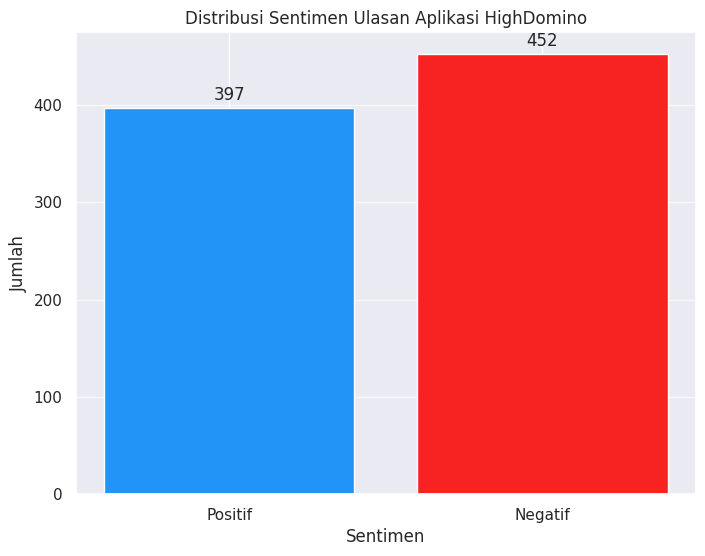

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HighDomino")


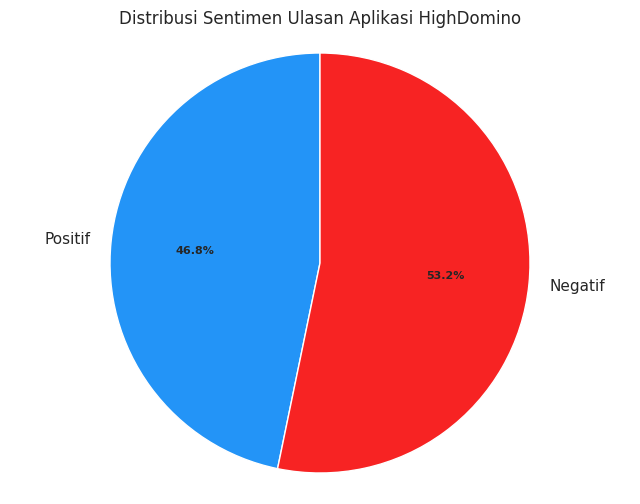

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HighDomino")

In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,apa apa apa,What's wrong?,0
2,apa apa apa,What's wrong?,0
4,makin buruk,It's getting worse.,0
6,ting parah,bad ting,0
7,mantap,Steady.,1
...,...,...,...
1316,game nya mantap ngebosenin,It's a great game. It's boring.,0
1319,the best,the best,1
1321,game sih asik yang jadi gk asiknya gk lagi tuk...,It's a fun game. It's not fun to exchange puls...,0
1322,nggih,Sophisticated.,1


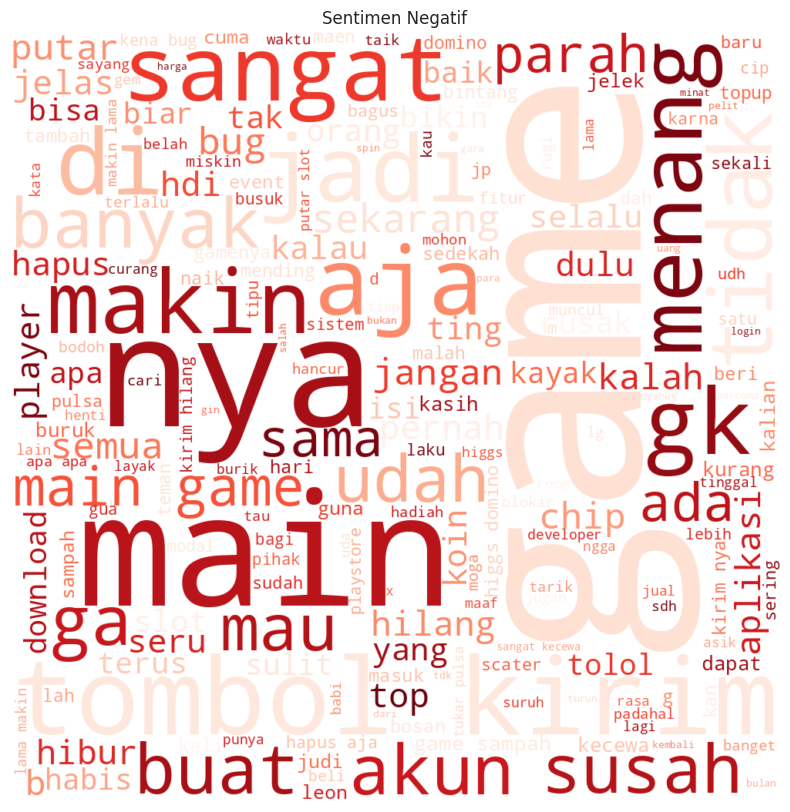

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

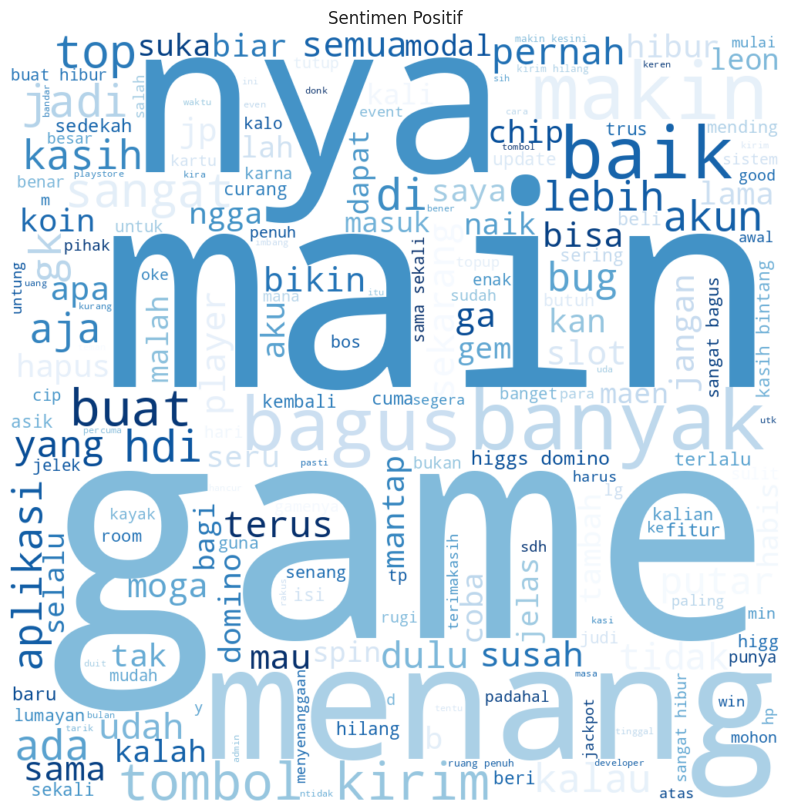

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
0    452
1    397
Name: count, dtype: int64

# **Data Preparation & Modeling**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [48]:
X_train

20                game sangat tdk guna kasi sepertialahan
1228                                      kecewa pullllll
69      akun kena bug akun bug bisa main bandar qiuqiu...
67            game jembud sedekah aja susah naek apa beli
504                        game gblok tolol usah download
                              ...                        
105                     jangan yang beli chips game rusak
163                                             klh terus
420     game normal ting biar kalah lihat ting nya kal...
671                      game sampahnyesel main game judi
156                                moga game cepat blokir
Name: content, Length: 509, dtype: object

In [49]:
# Menggunakan TfidfVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)


TfidfVectorizer()

In [50]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [51]:
X_train_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.538235294117647
Akurasi untuk c = 0.05: 0.6823529411764706
Akurasi untuk c = 0.25: 0.7264705882352941
Akurasi untuk c = 0.5: 0.7176470588235294
Akurasi untuk c = 0.75: 0.7176470588235294
Akurasi untuk c = 1: 0.7205882352941176


In [53]:
linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

In [54]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7205882352941176 


In [55]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.72
[[132  37]
 [ 58 113]]
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       169
           1       0.75      0.66      0.70       171

    accuracy                           0.72       340
   macro avg       0.72      0.72      0.72       340
weighted avg       0.72      0.72      0.72       340



In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives (TN) = ', cm[0, 0])

print('\nTrue Positives (TP) = ', cm[1, 1])

print('\nFalse Negatives (FN) = ', cm[0, 1])

print('\nFalse Positives (FP) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[132  37]
 [ 58 113]]

True Negatives (TN) =  132

True Positives (TP) =  113

False Negatives (FN) =  37

False Positives (FP) =  58

Accuracy =  0.7205882352941176


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

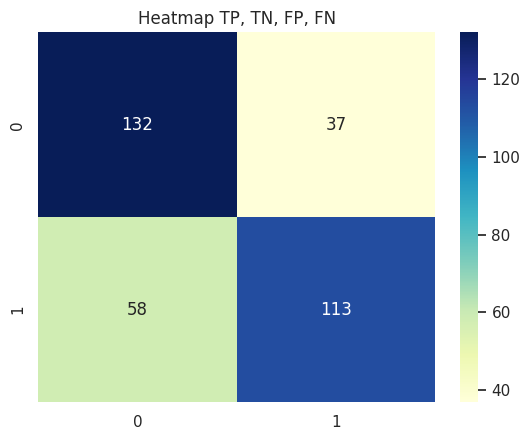

In [57]:
cm_matrix = pd.DataFrame(data=cm, columns=['0' , '1'],
                                 index=['0' , '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [58]:
# Classification Accuracy

TN = cm[0,0]
TP = cm[1,1]
FN = cm[0,1]
FP = cm[1,0]

In [59]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7206


In [60]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2794


# **Testing**


In [61]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : lumayan
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 74.36%
Probabilitas: 74.35850751485107 %


In [62]:
# Contoh teks baru
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
    probability = predicted_proba[0][1] * 100
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][0] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : jelek kalah terus
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 60.87%
Probabilitas: 60.86837893064793 %
